<a href="https://colab.research.google.com/github/AnnaEzGa/Pr-ctica-1/blob/main/Pr%C3%A0ctica_1_amb_una_millora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Particle in a 1D Harmonic Oscillator ##

La partícula será un electrón y las unidades, unidades atómicas. Se trata de un sistema en el que el potencial es finito y el electrón se comporta como un oscilador hamónico.

## CAMBIOS/CORRECCIONES

Este documento es el mismo que el copartido con el nombre de "Pràcticas_1_sense_corregir.ipynb", pero con una serie de corecciones y cambios adicionales, que sirven para poder observar mejor los efectos que tiene el potencial que he establecido, sobre el sistema:

PROBLEMA:
Que el potencial sea finito implica que existe una probabilidad NO nula de encontrar el electrón fuera de las barreras de potencial. Este fenómeno se conoce como efecto túnel. Por lo tanto, esto hace que la función de onda no sea exactamente nula fuera del pozo, sino que decaiga exponencialmente.
Sin embargo, en el documento anterior se había definido un valor del potencial muy elevado (V0 = 50 hartree), el cual era el responsable de que la representación gráfica pareciera prácticamente nula. Por este motivo, el sistema se comportaba de forma muy similar a un pozo de potencial infinito.

MEJORA:
En este documento se ha reducido el valor del potencial a V0 = 1.5 hartree. De este modo, la función de onda no decae tan rápidamente fuera de las barreras y se puede observar claramente que existe una probabilidad no nula de encontrar el electrón fuera del pozo. Esto permite visualizar de forma más clara el efecto túnel y comprobar cómo la penetración de la función de onda depende del valor del potencial.

Esta corrección ha sido realizada a propósito, con el objetivo de comparar el efecto del potencial y su valor sobre el sistema, tanto cuando este toma valores grandes como cuando toma valores más pequeños, y observar cómo esto afecta el confinamiento del electrón y la penetración de la función de onda fuera del pozo.




1. IMPORTAMOS LIBRERÍAS:

In [12]:
import numpy as np
import matplotlib.pyplot as plt

Utilizamos los mismos parámetros (constante recuperadora K=1) que en el " Chemistry LibreText example" https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Quantum_Tutorials_(Rioux)/09%3A_Numerical_Solutions_for_Schrodinger's_Equation/9.09%3A_Numerical_Solutions_for_the_Harmonic_Oscillator

2. DEFINIMOS EL POTENCIAL

En este caso definiremos un potencial finito.

In [13]:
#Potential as a function of position. In these case I have diced a finit potencial.
def getV(x):
    L = 20
    V0 = 1.5 # Altura de potencial (hartree=27eV)
    if -L/3 < x < L/3:
        return 0.0
    else:
        return V0

3. DEFINIMOS LA MATRIZ F Y SUS TÉRMINOS

In [14]:
#Discretized Schrodinger equation in n points (FROM 0 to n-1)
def Eq(n,h,x):
    F = np.zeros([n,n])
    for i in range(0,n):
        F[i,i] = -2*((h**2)*getV(x[i]) + 1)
        if i > 0:
           F[i,i-1] = 1
           if i < n-1:
              F[i,i+1] = 1
    return F

Vemos pues, que F depende de:
- h: La discretización, es decir Δx
- x: El tamaño de la caja

4. ESTABLECEMOS EL VALORES DE h Y DEL TAMAÑO ED LA CAJA

In [15]:
# Interval for calculating the wave function [-L/2,L/2]
L = 20
xlower = -L/2.0
xupper = L/2.0

#Discretization options
h = 0.05  #discretization in space

#Create coordinates at which the solution will be calculated
x = np.arange(xlower,xupper+h,h)
#grid size (how many discrete points to use in the range [-L/2,L/2])
npoints=len(x)

print("Using",npoints, "grid points.")

Using 401 grid points.


5. DIAGONALIZACIÓN DE F

A diagonalizar, recordemos que:
- Vectores própios: Funciones de onda própias del sistema.
- Valores própios: as energías permitidas en el sistema.

Pues los resultados de la diagonalización NO están ordenados, por lo que tendremos que ordenar los resultados por valores de energía.

In [16]:
#Calculation of discrete form of Schrodinger Equation and diagonalization
F=Eq(npoints,h,x)
eigenValues, eigenVectors = np.linalg.eig(F)

#Order results by eigenvalue
# w ordered eigenvalues and vs ordered eigenvectors
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:,idx]

#Energy Level
E = - w/(2.0*h**2)

6. MOSTRAMOS LOS NIVELES DE ENERGÍA DE LOS PRIMEROS NIVELES DE ENERGÍA Print

In [17]:
#Energy Levels
E = - w/(2.0*h**2)
for k in range(0,5):
  print("n=",k,", E(numeric)=%.4f" %E[k])

n= 0 , E(numeric)=0.0234
n= 1 , E(numeric)=0.0936
n= 2 , E(numeric)=0.2102
n= 3 , E(numeric)=0.3724
n= 4 , E(numeric)=0.5789


7. GRAFICAR LAS FUNCIONES DE ONDA OBTENIDAS EN EL PROCESO DE DIAGONALIZACIÓN

Plotting


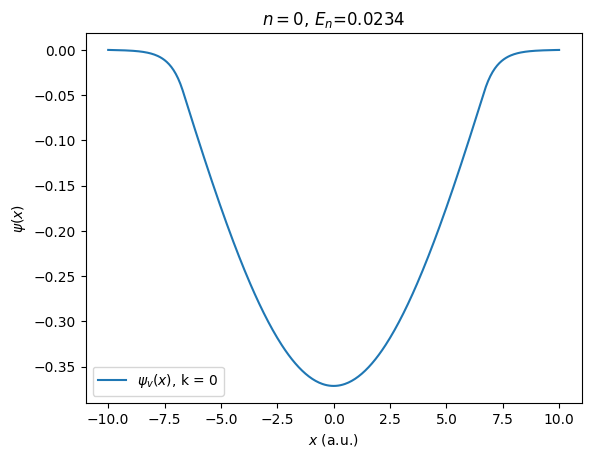

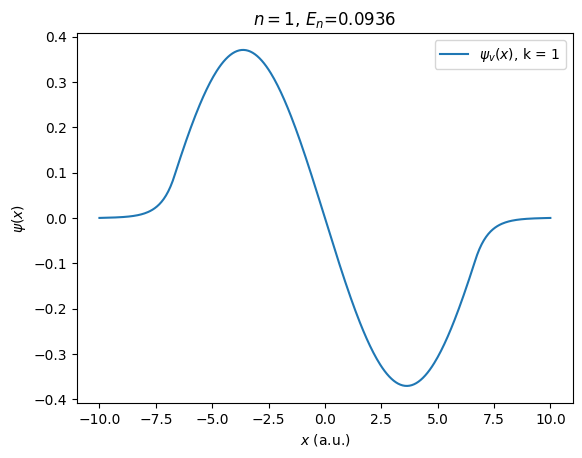

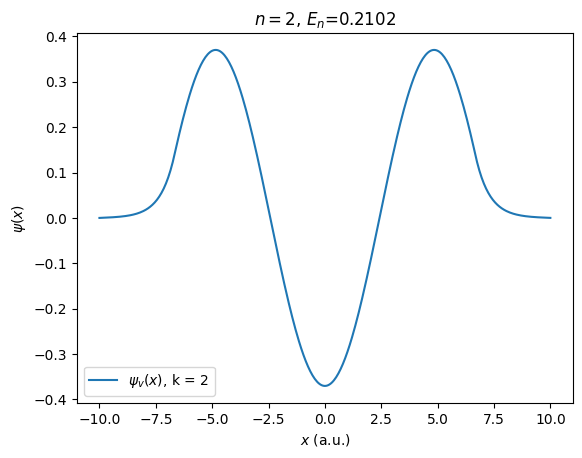

Bye


In [18]:
#Init Wavefunction (empty list with npoints elements)
psi = [None]*npoints

#Calculation of normalised Wave Functions
for k in range(0,len(w)):
	psi[k] = vs[:,k]
	integral = h*np.dot(psi[k],psi[k])
	psi[k] = psi[k]/integral**0.5

#Plot Wave functions
print("Plotting")

#v = int(input("\n Quantum Number (enter 0 for ground state):\n>"))
for v in range(0,3):
	plt.plot(x,psi[v],label=r'$\psi_v(x)$, k = ' + str(v))
	plt.title(r'$n=$'+ str(v) + r', $E_n$=' + '{:.4f}'.format(E[v]))
	plt.legend()
	plt.xlabel(r'$x$ (a.u.)')
	plt.ylabel(r'$\psi(x)$')
	plt.show()

print("Bye")


## Ahora vamos a repetir los pasos 4, 5, 6, 7 pero para h=0,02: ##

PASO 4:

In [19]:
# Interval for calculating the wave function [-L/2,L/2]
L = 20
xlower = -L/2.0
xupper = L/2.0

#Discretization options
h = 0.02  #discretization in space

#Create coordinates at which the solution will be calculated
x = np.arange(xlower,xupper+h,h)
#grid size (how many discrete points to use in the range [-L/2,L/2])
npoints=len(x)

print("Using",npoints, "grid points.")

Using 1001 grid points.


PASO 5:

In [20]:
#Calculation of discrete form of Schrodinger Equation and diagonalization
F=Eq(npoints,h,x)
eigenValues, eigenVectors = np.linalg.eig(F)

#Order results by eigenvalue
# w ordered eigenvalues and vs ordered eigenvectors
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:,idx]

#Energy Level
E = - w/(2.0*h**2)

PASO 6:

In [21]:
#Energy Levels
E = - w/(2.0*h**2)
for k in range(0,5):
  print("n=",k,", E(numeric)=%.4f" %E[k])

n= 0 , E(numeric)=0.0235
n= 1 , E(numeric)=0.0938
n= 2 , E(numeric)=0.2105
n= 3 , E(numeric)=0.3730
n= 4 , E(numeric)=0.5799


PASO 7:

Plotting


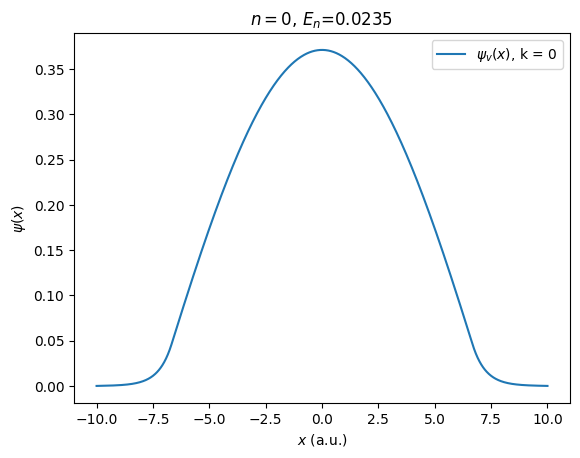

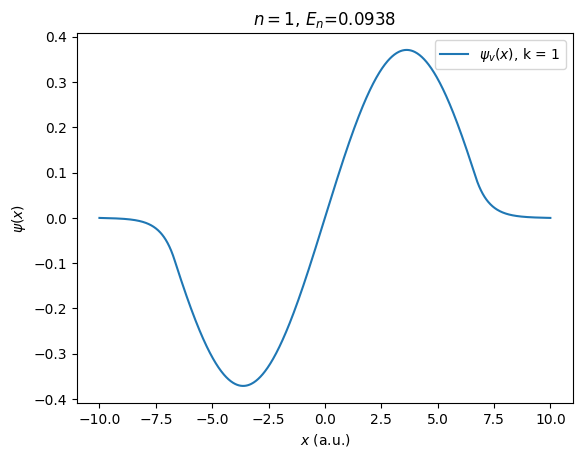

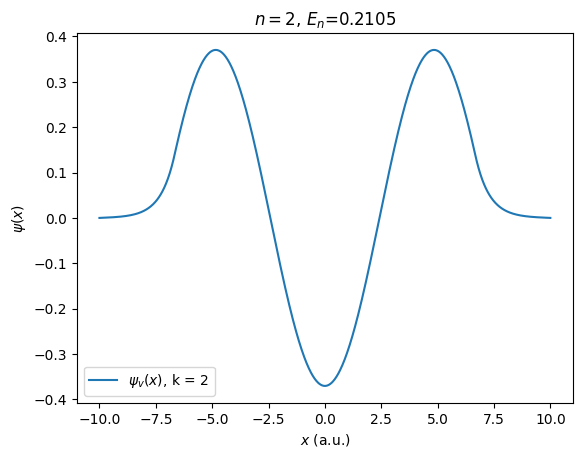

Bye


In [22]:
#Init Wavefunction (empty list with npoints elements)
psi = [None]*npoints

#Calculation of normalised Wave Functions
for k in range(0,len(w)):
	psi[k] = vs[:,k]
	integral = h*np.dot(psi[k],psi[k])
	psi[k] = psi[k]/integral**0.5

#Plot Wave functions
print("Plotting")

#v = int(input("\n Quantum Number (enter 0 for ground state):\n>"))
for v in range(0,3):
	plt.plot(x,psi[v],label=r'$\psi_v(x)$, k = ' + str(v))
	plt.title(r'$n=$'+ str(v) + r', $E_n$=' + '{:.4f}'.format(E[v]))
	plt.legend()
	plt.xlabel(r'$x$ (a.u.)')
	plt.ylabel(r'$\psi(x)$')
	plt.show()

print("Bye")

En este caso, en vez de poner h=0,05 como antes, yo he establecido que h=0,02. Con este cambio, no he observado ninguna modificación en el gráfico, pero no obstante eso, si ha habido una variación en el tiempo de cálculo, ya que este se ha ejecutado de manera un poco más lenta, debido a que la precisión del cálculo es mayor ahora.

Por otra parte, han variado los valores de las enrgías, ya que de estos han cambiado todos los decimeles exceptos dos primeros. Por lo tanto, podríamos decir que solo podemos fiarnos de los dos primeros decimales.
